In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

## データ準備

In [4]:
mnist = fetch_mldata('MNIST original')
mnist_X, mnist_y = shuffle(mnist.data, mnist.target.astype('int32'),
                           random_state=42)

# 輝度値のスケーリング
mnist_X = mnist_X / 255.0
# 今回は時間短縮のため1000個を使用
mnist_X, mnist_y = mnist_X[:1000], mnist_y[:1000]
# 学習データとテストデータに分ける
train_X, test_X, train_y, test_y = train_test_split(mnist_X, mnist_y,
                                                    test_size=0.2,
                                                    random_state=43)
# one-of-k表現にする。
train_y = np.eye(10)[train_y]

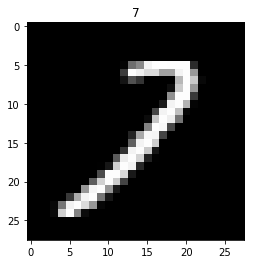

In [5]:
def show_image(x, t, y=None):
    x.resize(28, 28)
    plt.imshow(x, 'gray')
    if y is not None:
        plt.title("true: {0}, pred: {1}".format(t, y))
    else:
        plt.title(t)
    plt.show()
show_image(train_X[0], np.argmax(train_y[0]))

## 活性化関数

In [9]:
def sigmoid(x):
    """ sigmoid function
    """
    return ### WRITEME ###

def derive_sigmoid(x):
    """ derivative function of sigmoid
    """
    return ### WRITEME ###

## レイヤー

In [10]:
class Layer:
    def __init__(self, in_dim, out_dim, function, deriv_function):
        self.W = np.random.uniform(low= -0.08, high= 0.08,
                                                           size=(in_dim, out_dim)).astype("float32") # 重み
        self.b = np.zeros(out_dim).astype("float32") # バイアス
        self.function = function # 活性化関数
        self.deriv_function = deriv_function # 活性化関数の微分
        self.a = None
        self.delta = None
        
    def f_prop(self, x):
        """ feedforward
        """
        
        return ### WRITEME ###
    
    def b_prop(self, delta, W):
        """ back propagation
        """

        return ### WRITEME ###

In [11]:
def f_props(layers, x):
    """ feedforward from input layer
    """
    z = x
    for layer in layers:
        z = layer.f_prop(z)
    return z

def b_props(layers, delta):
    """ back propagation from output layer
    """
    for i, layer in enumerate(layers[::-1]):
        if i == 0:
            layer.delta = delta
        else:
            delta = layer.b_prop(delta, _W)
        _W = layer.W

## 学習

In [12]:
def train(X, t, eps=0.001):
    """ train on given minibatch
    """
    # feed forward & back propagation
    y = f_props(layers, X)
    delta = ### WRITEME ###
    b_props(layers, delta)

    # update layer by layer
    z = X
    for i, layer in enumerate(layers):
        dW = np.dot(z.T, layer.delta)
        db = np.dot(np.ones(len(z)), layer.delta)
        layer.W = layer.W - eps*dW
        layer.b = layer.b - eps*db
        z = layer.z

def test(X, t):
    """ feed forward on given minibatch
    """
    y = f_props(layers, X)
    return y

SyntaxError: invalid syntax (<ipython-input-12-6ea507456491>, line 6)

In [13]:
## set layer
layers = [Layer(784, 100, sigmoid, derive_sigmoid), 
                Layer(100, 10, sigmoid, derive_sigmoid)]
## train loop
for epoch in range(10):
    for x, y in zip(train_X, train_y):
        train(x[np.newaxis, :], y[np.newaxis, :], eps=0.1)    
    pred_y = test(test_X, test_y)
    pred_y = [np.argmax(y) for y in pred_y]
    print("accuracy: ", accuracy_score(pred_y, test_y))

print("Finish Training")

NameError: name 'train' is not defined